<a href="https://colab.research.google.com/github/Geu-Pro2023/linear_regression_model/blob/main/zoo_multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploring Machine Learning Models to Predict Animal Classes Based on Zoological Features**

***This project focuses on leveraging machine learning techniques to classify animals into their respective classes using a dataset containing zoological features. The dataset includes various binary attributes such as Hair, Feathers, and Eggs, along with numerical and categorical data. ***

**Key tasks involve building and evaluating Linear Regression, Decision Tree, and Random Forest models to determine the most accurate predictor.**

In [9]:
# Import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

##**Load the Dataset**

In [10]:
# Load the dataset
data = pd.read_csv('/content/zoo.csv')

In [3]:
# Display the first few rows of the dataset
data.head(10)

,Animal_Name,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


## **Data exploration**

In [11]:
# Check for basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Animal_Name  101 non-null    object
 1   Hair         101 non-null    int64 
 2   Feathers     101 non-null    int64 
 3   Eggs         101 non-null    int64 
 4   Milk         101 non-null    int64 
 5   Airborne     101 non-null    int64 
 6   Aquatic      101 non-null    int64 
 7   Predator     101 non-null    int64 
 8   Toothed      101 non-null    int64 
 9   Backbone     101 non-null    int64 
 10  Breathes     101 non-null    int64 
 11  Venomous     101 non-null    int64 
 12  Fins         101 non-null    int64 
 13  Legs         101 non-null    int64 
 14  Tail         101 non-null    int64 
 15  Domestic     101 non-null    int64 
 16  Catsize      101 non-null    int64 
 17  Class_Type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [12]:
# Display the first few rows of the processed data
print(data.head())

  Animal_Name  Hair  Feathers  Eggs  Milk  Airborne  Aquatic  Predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   Toothed  Backbone  Breathes  Venomous  Fins  Legs  Tail  Domestic  Catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   Class_Type  
0           1  
1           1  
2           4  
3   

In [13]:
# Display the statistical describe of the data
data.describe()

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Class_Type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
# Separate the features and the target variable

# All columns except 'Legs'
X = data.drop(columns=['Legs'])

# The 'Legs' column is the target
y = data['Legs']

# Display the features (X) and target (y)
print("Features (X):")

# Display the first few rows of the features
print(X.head())
print("\nTarget (y):")

# Display the first few rows of the target
print(y.head())

Features (X):
  Animal_Name  Hair  Feathers  Eggs  Milk  Airborne  Aquatic  Predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   Toothed  Backbone  Breathes  Venomous  Fins  Tail  Domestic  Catsize  \
0        1         1         1         0     0     0         0        1   
1        1         1         1         0     0     1         0        1   
2        1         1         0         0     1     1         0        0   
3        1         1         1         0     0     0         0        1   
4        1         1         1         0     0     1         0        1   

   Class_Type  
0           1  
1           1  
2           4  
3           1  
4         

#**Data Visualizations**

### **1. Scatter Plot of Linear Regression Predictions**

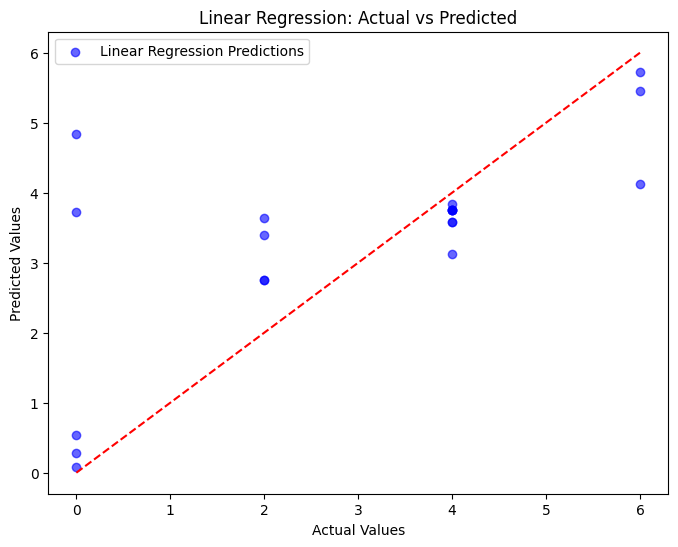

In [26]:
# Scatter Plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions, color='blue', alpha=0.6, label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

### **2. Correlation Heatmap**

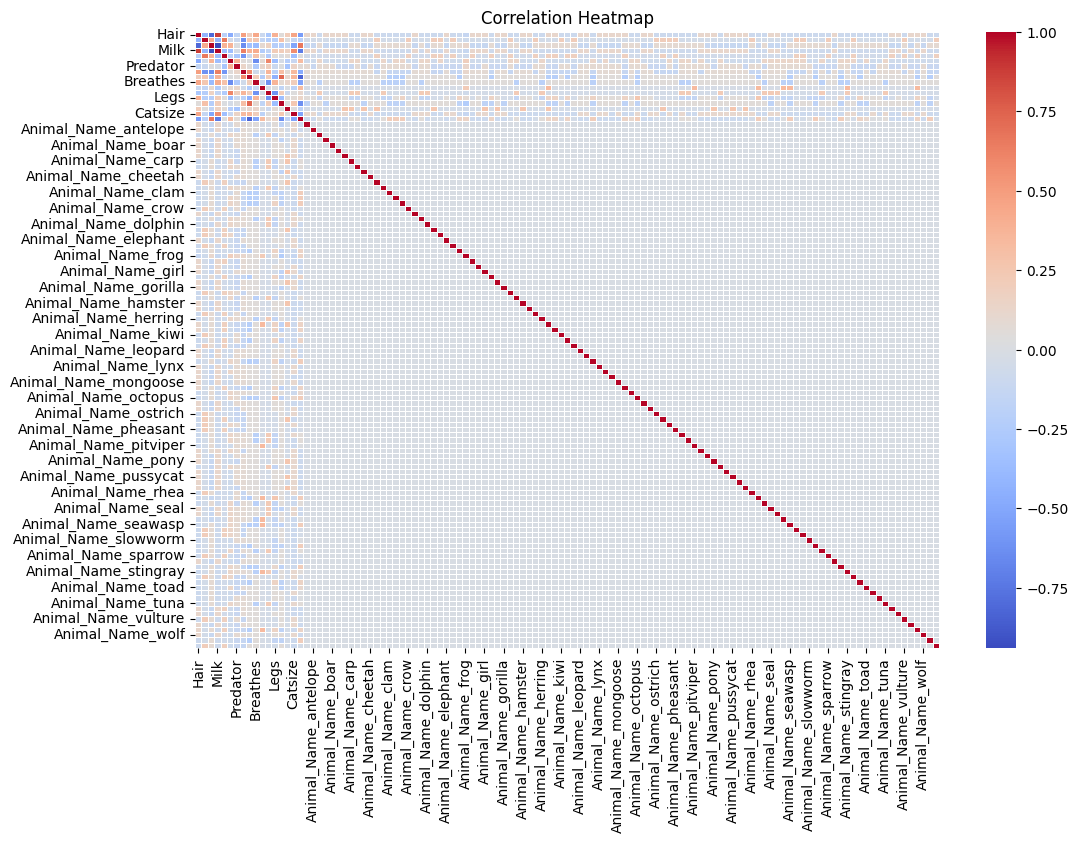

In [16]:
# Encode the 'Animal_Name' column using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Animal_Name'])

# Calculate the correlation matrix on the encoded data
corr = data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#**Traing the model and Initializing the LinearRegression**

In [17]:
# Encode categorical data (e.g., Animal_Name) using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Animal_Name'], drop_first=True)

# Define the features (X) and target (y)
X = data_encoded.drop(columns=['Legs'])  # Use all other columns as features
y = data_encoded['Legs']  # Target is 'Legs'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

#### **Predict the values and compare them to the original values**

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

    Actual  Predicted
84       2   3.389342
55       4   3.580019
66       0   0.544614
67       4   3.759880
45       4   3.759880


#### **Determine the accuracy of model in percentage**

In [19]:
# Predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

accuracy_percentage = r2 * 100
print('Accuracy: {:.2f}%'.format(accuracy_percentage))

Mean Squared Error: 2.3250362345691147
Root Mean Squared Error: 1.5248069499346844
R-squared: 0.42525729851738825
Accuracy: 42.53%


# **Creating Linear Regression model, Random Forest Model and Decision Trees Mode**

#### **1. Linear Regression**

In [20]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
linear_accuracy_percentage = linear_r2 * 100

#### **2. Random Forest**

In [21]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_accuracy_percentage = rf_r2 * 100

#### **3. Decision Tree**

In [22]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
dt_accuracy_percentage = dt_r2 * 100

In [23]:
# Print the Models
print(f"Linear Regression - MSE: {linear_mse:.4f}, R²: {linear_r2:.4f}, Accuracy: {linear_accuracy_percentage:.2f}%")
print(f"Random Forest - MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}, Accuracy: {rf_accuracy_percentage:.2f}%")
print(f"Decision Tree - MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}, Accuracy: {dt_accuracy_percentage:.2f}%")

Linear Regression - MSE: 2.3250, R²: 0.4253, Accuracy: 42.53%
Random Forest - MSE: 2.3354, R²: 0.4227, Accuracy: 42.27%
Decision Tree - MSE: 2.6667, R²: 0.3408, Accuracy: 34.08%


# **Compare the Modes**

Model Comparison:
               Model       MSE        R²  Accuracy (%)
0  Linear Regression  2.325036  0.425257     42.525730
1      Random Forest  2.335395  0.422697     42.269658
2      Decision Tree  2.666667  0.340807     34.080717


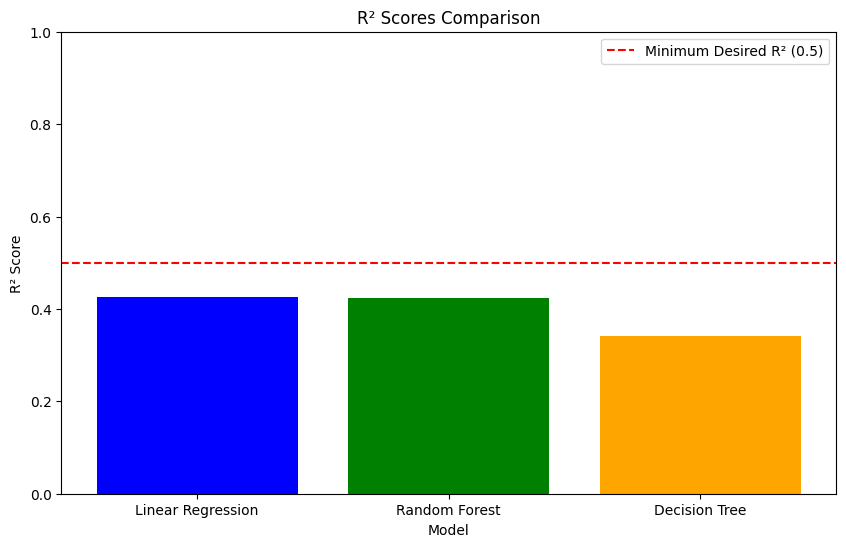

In [24]:
# Compile results into a dictionary
results = {
    "Model": ["Linear Regression", "Random Forest", "Decision Tree"],
    "MSE": [linear_mse, rf_mse, dt_mse],
    "R²": [linear_r2, rf_r2, dt_r2],
    "Accuracy (%)": [linear_accuracy_percentage, rf_accuracy_percentage, dt_accuracy_percentage]
}

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the comparison table
print("Model Comparison:")
print(results_df)

# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R²'], color=['blue', 'green', 'orange'])
plt.title('R² Scores Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set the range for better visualization
plt.axhline(0.5, color='red', linestyle='--', label='Minimum Desired R² (0.5)')
plt.legend()
plt.show()

# **Determine the best models**

In [25]:
# Find the model with the highest R² score
best_model_index = results_df['R²'].idxmax()
best_model_name = results_df['Model'][best_model_index]
best_model_r2 = results_df['R²'][best_model_index]
best_model_accuracy = results_df['Accuracy (%)'][best_model_index]

# Print the best model
print(f"The best model is {best_model_name} with an R² score of {best_model_r2:.2f} and Accuracy of {best_model_accuracy:.2f}%")

The best model is Linear Regression with an R² score of 0.43 and Accuracy of 42.53%


# **Description of the Performance Metrics Based on Results:**
###**1. Mean Squared Error (MSE):**

MSE quantifies the average squared difference between the predicted and actual values. It penalizes larger errors more heavily, making it sensitive to outliers. A lower MSE indicates better performance.

From the results:

Linear Regression (2.3250): The lowest MSE, meaning it provides the closest predictions to the actual values among the models.
Random Forest (2.3354): Slightly higher MSE than Linear Regression, showing it is slightly less accurate.
Decision Tree (2.6667): The highest MSE, indicating the least accurate predictions among the three models.

###**2. Root Mean Squared Error (RMSE):**

RMSE is the square root of the MSE, providing an interpretable metric in the same units as the target variable. It directly reflects the average prediction error.

Linear Regression RMSE (1.5248): This means, on average, predictions are off by ~1.52 units from actual values.

###**3. R-squared (R²):**
The R² score measures the proportion of variation in the target variable explained by the model. It ranges from -∞ to 1, with higher values being better.

From the results:

Linear Regression (0.4253): Explains 42.53% of the variation in the target variable, the highest among the models.
Random Forest (0.4227): Explains 42.27%, slightly less effective than Linear Regression.
Decision Tree (0.3408): Explains only 34.08%, the least effective in capturing variation.

###**4. Accuracy (%):**
Accuracy, derived from the R² score, expresses the effectiveness of each model in a more interpretable percentage format.

From the results:

Linear Regression (42.53%): The most accurate model, explaining nearly 43% of the variation.
Random Forest (42.27%): Nearly as accurate as Linear Regression but falls slightly short.
Decision Tree (34.08%): The least accurate, explaining only ~34% of the variation.

#**Save the best model**

In [27]:
import joblib

# Save the best model based on the comparison
if best_model_name == "Linear Regression":
    best_model = linear_model
elif best_model_name == "Random Forest":
    best_model = random_forest
else:
    best_model = decision_tree

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [28]:
import pickle

# Save feature names after encoding
feature_names = X.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load your dataset
data = pd.read_csv('zoo.csv')

# Encode categorical data (e.g., Animal_Name) using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Animal_Name'], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop(columns=['Legs'])  # Remove 'Legs' column from features
y = data_encoded['Legs']  # 'Legs' is the target variable

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head(10))  # Display top 10 important features

# Save the important features (top 10 for example)
important_features = feature_importance_df.head(10)['Feature'].tolist()

# Save the list of important features
with open('important_features.pkl', 'wb') as f:
    joblib.dump(important_features, f)

print("Important features saved!")


                 Feature  Importance
11                  Fins    0.346665
15            Class_Type    0.103391
1               Feathers    0.080580
113     Animal_Name_worm    0.047120
28      Animal_Name_clam    0.046748
8               Backbone    0.043226
95      Animal_Name_slug    0.040827
91   Animal_Name_seawasp    0.035737
0                   Hair    0.032888
67   Animal_Name_octopus    0.020295
Important features saved!


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

# Load the zoo dataset again
data = pd.read_csv('/content/zoo.csv')

# Apply one-hot encoding to categorical columns (e.g., Animal_Name)
data_encoded = pd.get_dummies(data, columns=['Animal_Name'], drop_first=True)

# Select only the important features (top 10 from the previous output)
X_important = data_encoded[important_features]  # Use encoded columns

# Target variable
y = data['Legs']

# Initialize and retrain the model with only the important features
model_retrained = RandomForestRegressor(n_estimators=100, random_state=42)
model_retrained.fit(X_important, y)

# Create the directory if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the retrained model
joblib.dump(model_retrained, 'models/retrained_model.pkl')
print("Retrained model saved successfully!")

Retrained model saved successfully!
